# Sistema analogico de la familia Butterworth

Comenzamos importando las bibliotecas necesarias. En este caso, estamos utilizando numpy para cálculos numéricos y matplotlib para la visualización de gráficos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A continuación determinamos el orden del filtro (K) y la frecuencia de corte (omegac). En caso de hacerlo interactivo y que se le permita al usuario ingresar los valores por teclado, se pueden utilizar las lineas de código comentadas. Recordamos que significan estos dos parámetros:

* **Orden del Filtro (K)**: Respecta la cantidad de polos que presenta la función de transferencia del filtro.

* **Frecuencia de corte**: Frecuencia para la cuál se da una atenuación de 3 dB (Diagrama de Bode) y se observa que la magnitud de la respuesta del filtro alcanza la mitad de su valor máximo (módulo para la función normalizada vale 1/sqrt(2)).


In [2]:
K=4
omegac=15

#K = int(input("Enter order K of the filter: "))
#omegac = float(input("Enter cutoff frequency: "))

A continuación se definen algunas variables para el cálculo de la función de transferencia: k, p, A, omega, H, HB y argH.
* k contiene números enteros del 1 al K.
* p calcula las raíces complejas de la función de transferencia.
* A calcula el polinomio característico del filtro Butterworth.
* omega crea un rango de valores de frecuencia angular para trazar el gráfico. Es la variable que irá en el eje horizontal.
* H calcula la respuesta en frecuencia del filtro.
* HB calcula la respuesta en frecuencia en decibeles (dB), es decir, la respuesta en frecuencia a graficar en el Diagrama de Bode.
* argH = np.angle(H, deg=True) toma la respuesta del filtro H, calcula la fase de esta respuesta en grados (dado por el parametro deg=True) y almacena esos valores en la variable argH.

In [4]:
k = np.arange(1, K + 1)
p = 1j * omegac * np.exp(1j * np.pi / (2 * K) * (2 * k - 1))
A = np.poly(p)
omega = np.linspace(0, 35, 1001)
H = omegac**K / np.polyval(A, 1j * omega)
HB = 20*np.log10(H)
argH = np.angle(H, deg=True) 

Utilizamos **plt.plot()** para trazar una función en el gráfico. Omega es el eje x (la variable independiente) y np.abs(H) es el eje y (la variable dependiente). Esta función grafica H(omega) para los valores de omega definidos previamente con np.linspace(). Esto representa la respuesta de magnitud del filtro de Butterworth en función de omega.

La función **plt.axhline()** agrega una línea horizontal punteada en el valor 1/sqrt(2) del gráfico. Esto se usa para marcar el punto donde la magnitud de la respuesta del filtro cae a la mitad de su valor máximo. axhline significa "línea horizontal del eje x" e y especifica la coordenada en la que se coloca la línea punteada. Los detalles de linestyle y color son meramente elecciones de diseño. 

Con **plt.title()**, establecemos el título del gráfico. En este caso, el título es "Butterworth Filter magnitude response".

Las funciones **plt.xlabel()** y **plt.ylabel** nos permiten etiquetar los ejes x e y del gráfico.

**plt.text()** se utiliza para agregar un texto en el gráfico en una posición específica. En este caso, coloca el texto "1/sqrt(2)" en las coordenadas (-7, 1/np.sqrt(2)) del gráfico. 

Por último, el comando **plt.show()** se emplea para mostrar el gráfico.

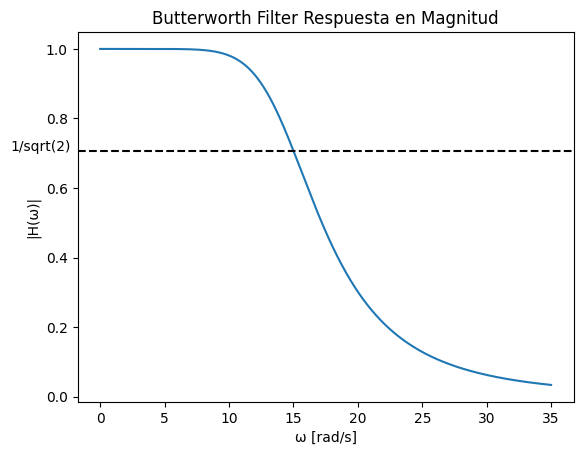

In [30]:
plt.plot(omega, np.abs(H))
plt.axhline(y=(1/np.sqrt(2)), linestyle='dashed', color='black')
plt.title("Butterworth Filter Respuesta en Magnitud")
plt.xlabel("\u03C9 [rad/s]")
plt.text(-7, (1/np.sqrt(2)), "1/sqrt(2)")
plt.ylabel("|H(\u03C9)|")
plt.show()


Se utiliza **plt.subplot(2, 1, 1)** para crear un sistema de gráficos con dos subgráficos apilados verticalmente. El número 2 indica que habrá dos filas de subgráficos, y el número 1 indica que este es el primer subgráfico. 

Se utiliza **plt.tight_layout()** para ajustar automáticamente el espaciado entre los dos subgráficos para que se vean correctamente apilados en la misma figura y no superpuestos.

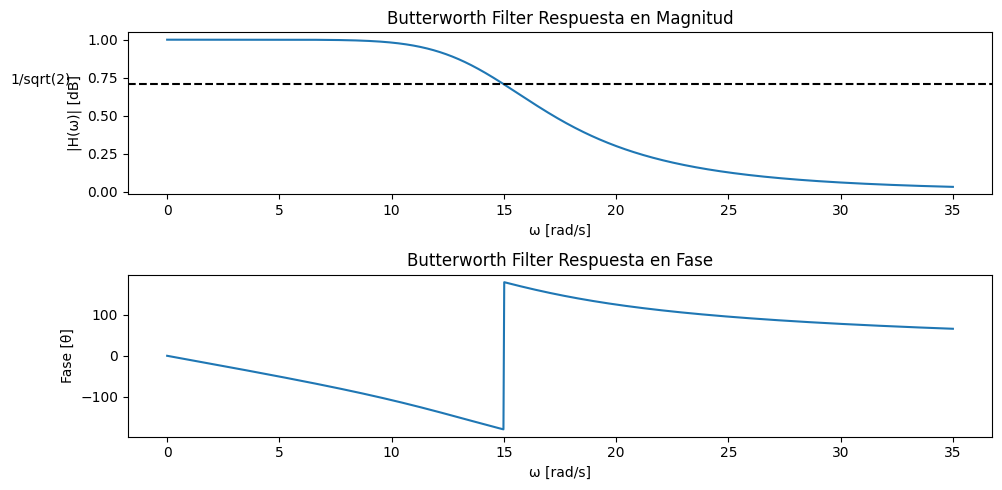

In [31]:
# Gráfico de magnitud
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(omega, np.abs(H))
plt.axhline(y=(1/np.sqrt(2)), linestyle='dashed', color='black')
plt.title("Butterworth Filter Respuesta en Magnitud")
plt.xlabel("\u03C9 [rad/s]")
plt.text(-7, (1/np.sqrt(2)), "1/sqrt(2)")
plt.ylabel("|H(\u03C9)| [dB]")

# Gráfico de Bode de fase
plt.subplot(2, 1, 2)
plt.plot(omega, argH)
plt.title("Butterworth Filter Respuesta en Fase")
plt.xlabel("\u03C9 [rad/s]")
plt.ylabel("Fase [\u03B8]")

# Ajustar el espaciado entre los dos gráficos
plt.tight_layout()

# Mostrar ambos gráficos
plt.show()